# TIOBE INDEX TOP 10(TOP9 + R)

In [1]:
language_top = ["Python", "C", "Java", "C++", "C#", "Visual Basic", "JavaScript", "SQL", "PHP", "R"]

- 상위 10개의 프로그래밍 언어(language_top)로 명명하고,
- 해당 언어와 관련한 도서 목록을 "언어, 출판시기, 제목, ISBN, 가격, 페이지수, 출판사, 상세페이지 링크"를 기준으로 수집
- 한국 도서만 가져올 것이기 때문에 "언어이름 + 프로그래밍"으로 검색

### NAVER API - 네이버 책(book)을 통해서 데이터 수집하기

In [2]:
# ID : C3csBw5KbJZBzLTYdRUG
# Secret : FzIEmV9vwT

In [3]:
# url 내 Book 으로 변경
# 검색어는 language_top을 차례대로 넣고 + "프로그래밍" 함께 입력

lang = "python"

import os
import sys
import urllib.request
client_id = "C3csBw5KbJZBzLTYdRUG"
client_secret = "FzIEmV9vwT"
encText = urllib.parse.quote(lang + "프로그래밍")
url = "https://openapi.naver.com/v1/search/book?query=" + encText # json 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
    
# 'title' 에 책 제목이 있고
# 'price' 에 가격이 있고 - 할인이 안되는 책도 있어서, 정가 기준으로 가져옴
# 'publisher' 에 출판사가 있고
# 'pubdate' 에 출판시기
# 'isbn' 에 ISBN번호 있음
# 페이지수가 없으니까, 해당 링크로 가서 페이지 가져와야 함 (BS로 가져오자)

{
"lastBuildDate": "Fri, 22 Oct 2021 14:45:01 +0900",
"total": 286,
"start": 1,
"display": 10,
"items": [
{
"title": "<b>Python 프로그래밍</b>(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=16685329",
"image": "https://bookthumb-phinf.pstatic.net/cover/166/853/16685329.jpg?type=m1&udate=20201024",
"author": "남상엽",
"price": "30000",
"discount": "29400",
"publisher": "상학당",
"pubdate": "20200915",
"isbn": "8965872022 9788965872023",
"description": "『<b>PYTHON 프로그래밍</b>』은 〈스마트로봇 EV3의 개요 및 구성〉, 〈파이썬의 개요 및 설정〉, 〈파이썬 프로그램 작성과 실행〉 등이 수록되어 있다."

},
{
"title": "<b>Python 프로그래밍</b>",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=11896450",
"image": "https://bookthumb-phinf.pstatic.net/cover/118/964/11896450.jpg?type=m1&udate=20170406",
"author": "서문석",
"price": "11500",
"discount": "11500",
"publisher": "퍼플",
"pubdate": "20170330",
"isbn": "0000281298 1400000281291",
"description": "있는 일반인뿐만 아니라 컴퓨터 전공자의 코딩 입문서로 활용이 가능하다. 교재 활용을 통해 <b>PYTHON</b

In [4]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"  # api_node 는 북인지, 쇼핑인지,,,,
    param_query = "?query=" + urllib.parse.quote(search_text + " 프로그래밍")
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

In [5]:
import json
import datetime

def get_result_onepage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print("[%s] Url Request Success" % datetime.datetime.now())
    return json.loads(response.read().decode("utf-8"))

In [6]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [7]:
import pandas as pd

def get_fields(json_data):
    
    title = [delete_tag(each["title"]) for each in json_data["items"]]
    link = [each["link"] for each in json_data["items"]]
    price = [each["price"] for each in json_data["items"]]
    publisher = [each["publisher"] for each in json_data["items"]]
    pubdate = [each["pubdate"] for each in json_data["items"]]
    isbn = [each["isbn"] for each in json_data["items"]]
    global lang
    result_pd = pd.DataFrame({
        "언어" : lang,
        "책제목" : title,
        "출판사" : publisher,
        "출판일" : pubdate,
        "판매가격" : price,
        "ISBN" : isbn,
        "상세링크" : link,
    }, columns=["언어", "책제목", "출판사", "출판일", "판매가격", "ISBN", "상세링크"])
    
    return result_pd


In [8]:
result_book =[]
for n in range(1, 1000, 100):
    url = gen_search_url("book", lang, n, 100)
    json_result = get_result_onepage(url)
    pd_result = get_fields(json_result)
    result_book.append(pd_result)
    
pd_result = pd.concat(result_book)

pd_result

[2021-10-22 14:45:01.595380] Url Request Success
[2021-10-22 14:45:02.161408] Url Request Success
[2021-10-22 14:45:02.603866] Url Request Success
[2021-10-22 14:45:02.753466] Url Request Success
[2021-10-22 14:45:02.875139] Url Request Success
[2021-10-22 14:45:02.987841] Url Request Success
[2021-10-22 14:45:03.089568] Url Request Success
[2021-10-22 14:45:03.202267] Url Request Success
[2021-10-22 14:45:03.320950] Url Request Success
[2021-10-22 14:45:03.487505] Url Request Success


언어                                                책제목          출판사  \
0   python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)          상학당   
1   python                                       Python 프로그래밍           퍼플   
2   python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍         카오스북   
3   python                                   Python 프로그래밍의 이해         교보문고   
4   python                             The Python - 파이썬 프로그래밍   BOOKK(부크크)   
..     ...                                                ...          ...   
81  python  [패키지] Game Programming Gems 6 + Game Programmi...         와우북스   
82  python        2022 시나공 정보처리기사 필기 (동영상강의 + 암기프로그램 + 기출CBT)           길벗   
83  python                                       그림으로 배우는 파이썬         영진닷컴   
84  python                    GRAPHICS LIVE 그래픽스 라이브 (2010.4)  캐드앤그래픽(월간지)   
85  python         거침없이 배우는 라즈베리 파이 (Raspberry Pi User Guide)          지앤선   

         출판일   판매가격                       ISBN  \
0   20200915  30000   8965872022 9788965872023   
1   20170330  11500   0000281298 1400000281291   
2   20180630  25000   1187486183 9791187486183   
3   20170117  18000   1159090289 9791159090288   
4   20210909  32000   1137255641 9791137255647   
..       ...    ...                        ...   
81  20110616  78000  201106160004 201106160004   
82  20211025  33000   1165217309 9791165217303   
83  20211110  18000   8931465858 9788931465853   
84  20100401   8000   1228898006 9771228898007   
85  20130327  25000   8993827575 9788993827576   

                                                 상세링크  
0   http://book.naver.com/bookdb/book_detail.php?b...  
1   http://book.naver.com/bookdb/book_detail.php?b...  
2   http://book.naver.com/bookdb/book_detail.php?b...  
3   http://book.naver.com/bookdb/book_detail.php?b...  
4   http://book.naver.com/bookdb/book_detail.php?b...  
..                                                ...  
81  http://book.naver.com/bookdb/book_detail.php?b...  
82  http://book.naver.com/bookdb/book_detail.php?b...  
83  http://book.naver.com/bookdb/book_detail.php?b...  
84  http://book.naver.com/bookdb/book_detail.php?b...  
85  http://book.naver.com/bookdb/book_detail.php?b...  

[286 rows x 7 columns]

In [9]:
pd_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 85
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      286 non-null    object
 1   책제목     286 non-null    object
 2   출판사     286 non-null    object
 3   출판일     286 non-null    object
 4   판매가격    286 non-null    object
 5   ISBN    286 non-null    object
 6   상세링크    286 non-null    object
dtypes: object(7)
memory usage: 17.9+ KB


In [10]:
pd.set_option("display.max_rows", 10000)

In [11]:
from tqdm import tqdm
for lang in tqdm(language_top[1:]):
    for n in range(1, 1000, 100):
        url = gen_search_url("book", lang, n, 100)
        json_result = get_result_onepage(url)
        pd_result = pd.concat([pd_result, get_fields(json_result)])

pd_result

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

[2021-10-22 14:45:04.062167] Url Request Success
[2021-10-22 14:45:04.422195] Url Request Success
[2021-10-22 14:45:04.805172] Url Request Success
[2021-10-22 14:45:05.241527] Url Request Success
[2021-10-22 14:45:05.618532] Url Request Success
[2021-10-22 14:45:05.981547] Url Request Success
[2021-10-22 14:45:06.367512] Url Request Success
[2021-10-22 14:45:06.832272] Url Request Success
[2021-10-22 14:45:07.338438] Url Request Success


 11%|█████████▎                                                                          | 1/9 [00:04<00:33,  4.14s/it]

[2021-10-22 14:45:07.765901] Url Request Success
[2021-10-22 14:45:08.138873] Url Request Success
[2021-10-22 14:45:08.534813] Url Request Success
[2021-10-22 14:45:08.988599] Url Request Success
[2021-10-22 14:45:09.480286] Url Request Success
[2021-10-22 14:45:09.952260] Url Request Success
[2021-10-22 14:45:10.479249] Url Request Success
[2021-10-22 14:45:10.892205] Url Request Success
[2021-10-22 14:45:11.326043] Url Request Success
[2021-10-22 14:45:11.723756] Url Request Success


 22%|██████████████████▋                                                                 | 2/9 [00:08<00:30,  4.31s/it]

[2021-10-22 14:45:12.191513] Url Request Success
[2021-10-22 14:45:12.551510] Url Request Success
[2021-10-22 14:45:12.902795] Url Request Success
[2021-10-22 14:45:13.307710] Url Request Success
[2021-10-22 14:45:13.685700] Url Request Success
[2021-10-22 14:45:14.081643] Url Request Success
[2021-10-22 14:45:14.495534] Url Request Success
[2021-10-22 14:45:14.915377] Url Request Success
[2021-10-22 14:45:15.389104] Url Request Success
[2021-10-22 14:45:15.808979] Url Request Success


 33%|████████████████████████████                                                        | 3/9 [00:12<00:25,  4.18s/it]

[2021-10-22 14:45:16.220847] Url Request Success
[2021-10-22 14:45:16.578889] Url Request Success
[2021-10-22 14:45:17.003755] Url Request Success
[2021-10-22 14:45:17.415826] Url Request Success
[2021-10-22 14:45:17.833428] Url Request Success
[2021-10-22 14:45:18.278269] Url Request Success
[2021-10-22 14:45:18.545522] Url Request Success
[2021-10-22 14:45:18.668224] Url Request Success
[2021-10-22 14:45:18.990944] Url Request Success
[2021-10-22 14:45:19.114581] Url Request Success


 44%|█████████████████████████████████████▎                                              | 4/9 [00:15<00:18,  3.73s/it]

[2021-10-22 14:45:19.255205] Url Request Success
[2021-10-22 14:45:19.638208] Url Request Success
[2021-10-22 14:45:20.037114] Url Request Success
[2021-10-22 14:45:20.492084] Url Request Success
[2021-10-22 14:45:20.944775] Url Request Success
[2021-10-22 14:45:21.440449] Url Request Success
[2021-10-22 14:45:21.741749] Url Request Success
[2021-10-22 14:45:21.874365] Url Request Success
[2021-10-22 14:45:22.010001] Url Request Success
[2021-10-22 14:45:22.136663] Url Request Success


 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:18<00:13,  3.46s/it]

[2021-10-22 14:45:22.241384] Url Request Success
[2021-10-22 14:45:22.713177] Url Request Success
[2021-10-22 14:45:23.158018] Url Request Success
[2021-10-22 14:45:23.669632] Url Request Success
[2021-10-22 14:45:23.995002] Url Request Success
[2021-10-22 14:45:24.109694] Url Request Success
[2021-10-22 14:45:24.238350] Url Request Success
[2021-10-22 14:45:24.360025] Url Request Success
[2021-10-22 14:45:24.482699] Url Request Success
[2021-10-22 14:45:24.685188] Url Request Success


 67%|████████████████████████████████████████████████████████                            | 6/9 [00:21<00:09,  3.15s/it]

[2021-10-22 14:45:24.796893] Url Request Success
[2021-10-22 14:45:25.279601] Url Request Success
[2021-10-22 14:45:25.816854] Url Request Success
[2021-10-22 14:45:26.294192] Url Request Success
[2021-10-22 14:45:26.770991] Url Request Success
[2021-10-22 14:45:27.229729] Url Request Success
[2021-10-22 14:45:27.663631] Url Request Success
[2021-10-22 14:45:28.217145] Url Request Success
[2021-10-22 14:45:28.668936] Url Request Success
[2021-10-22 14:45:29.127710] Url Request Success


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:26<00:07,  3.70s/it]

[2021-10-22 14:45:29.606466] Url Request Success
[2021-10-22 14:45:30.021360] Url Request Success
[2021-10-22 14:45:30.440387] Url Request Success
[2021-10-22 14:45:30.857288] Url Request Success
[2021-10-22 14:45:31.313065] Url Request Success
[2021-10-22 14:45:31.465666] Url Request Success
[2021-10-22 14:45:31.646145] Url Request Success
[2021-10-22 14:45:31.743883] Url Request Success
[2021-10-22 14:45:31.861598] Url Request Success
[2021-10-22 14:45:31.979289] Url Request Success


 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:28<00:03,  3.31s/it]

[2021-10-22 14:45:32.094974] Url Request Success
[2021-10-22 14:45:32.573697] Url Request Success
[2021-10-22 14:45:33.027596] Url Request Success
[2021-10-22 14:45:33.523813] Url Request Success
[2021-10-22 14:45:33.998545] Url Request Success
[2021-10-22 14:45:34.461849] Url Request Success
[2021-10-22 14:45:34.824877] Url Request Success
[2021-10-22 14:45:34.944589] Url Request Success
[2021-10-22 14:45:35.055262] Url Request Success
[2021-10-22 14:45:35.229827] Url Request Success


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:31<00:00,  3.52s/it]

[2021-10-22 14:45:35.348476] Url Request Success


언어                                                책제목  \
0         python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1         python                                       Python 프로그래밍   
2         python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3         python                                   Python 프로그래밍의 이해   
4         python                             The Python - 파이썬 프로그래밍   
5         python                                      Python 프로그래밍    
6         python                     Python 프로그래밍 정복하기 (창의적 사고를 위한)   
7         python                          python으로 배우는 OpenCV 프로그래밍   
8         python                           Python으로 쉽게 배우는 통계 프로그래밍   
9         python                               컴퓨팅 사고력 프로그래밍 PYTHON   
10        python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
11        python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
12        python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
13        python               Raspberry python을 이용한  python 프로그래밍    
14        python  Python과 Pygame으로 게임 만들기 (그래픽, 애니메이션, 사운드 프로그래밍...   
15        python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
16        python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
17        python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
18        python                               ROS 2로 시작하는 로봇 프로그래밍   
19        python        나만의 Python Game 만들기 (초보자를 위한 파이썬 프로그래밍 가이드)   
20        python  Black Hat Python (해커와 모의 침투 테스터를 위한 공격용 파이썬 프로...   
21        python  코어 파이썬 애플리케이션 프로그래밍 (Core Python Applications ...   
22        python                    [POD] The Python (파이썬 프로그래밍 1부)   
23        python                             The Python (파이썬 프로그래밍)   
24        python  C#과 파이썬을 활용한 OpenCV 4 프로그래밍 (컴퓨터 비전 기초 이론부터 머신...   
25        python                    [POD] The Python (파이썬 프로그래밍 2부)   
26        python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
27        python  Python Programming for Beginners (개념을 꼼꼼하게, 파이...   
28        python  Let’s Start Coding with Raptor & Python (Absol...   
29        python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
30        python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
31        python                            Python으로 배우는 문제해결과 인공지능   
32        python                                 프로그래밍 언어론 (원리와 실제)   
33        python                                 프로그래밍 언어론 (워크북 포함)   
34        python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35        python                             즐겁게 배우는 알고리즘과 프로그래밍 도감   
36        python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
37        python                                  창의적 프로그래밍을 위한 파이썬   
38        python                            Python을 이용한 데이터 분석과 시각화   
39        python               프로그래밍 언어도감 (가장 인기있는 프로그래밍 언어 67개 수록)   
40        python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
41        python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
42        python                              Flask 기반의 파이썬 웹 프로그래밍   
43        python                                            스타트 파이썬   
44        python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
45        python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
46        python                                  처음 시작하는 파이썬 프로그래밍   
47        python                    Python Programming 터틀부터 게임 개발까지   
48        python                                   작심 3일 파이썬 Python   
49        python                                 프로그래밍이 보인다! 파이썬 입문   
50        python                     파이썬 프로그래밍 (입문부터 실무까지 한 방에 끝내는)   
51        python                                       미래실험실 Python   
52        python                 파이썬 웹 프로그래밍 에센셜 (세 줄 코드부터 웹 서비스까지)   
53        python                      블로그에 자동으로 글 업로드(feat. python)   
54        python      Python Cookbook (Python 3를 정복하기 위한 보약 같은 레시피)   
55        python             Python 실습

In [12]:
pd_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6693 entries, 0 to 75
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      6693 non-null   object
 1   책제목     6693 non-null   object
 2   출판사     6693 non-null   object
 3   출판일     6693 non-null   object
 4   판매가격    6693 non-null   object
 5   ISBN    6693 non-null   object
 6   상세링크    6693 non-null   object
dtypes: object(7)
memory usage: 418.3+ KB


In [13]:
pd_result["언어"].value_counts()
# C, Java, C++, SQL은 1000권 이상이라는 것을 알 수 있다.

C               1000
Java            1000
C++             1000
SQL             1000
R                576
Visual Basic     554
C#               535
PHP              414
JavaScript       328
python           286
Name: 언어, dtype: int64

In [14]:
# 여기서 연도만 추출해서 컬럼을 하나 더 만들었다.
year_list = []


for year_info in pd_result["출판일"]:
    if len(year_info) <= 4 :
        year_list.append(year_info)
    else:
        year_list.append(year_info[:4])
    
pd_result["연도"] = year_list

In [15]:
# 연도 컬럼을 int형으로 변환
pd_result["연도"] = pd.to_numeric(pd_result["연도"])

In [16]:
pd_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6693 entries, 0 to 75
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      6693 non-null   object
 1   책제목     6693 non-null   object
 2   출판사     6693 non-null   object
 3   출판일     6693 non-null   object
 4   판매가격    6693 non-null   object
 5   ISBN    6693 non-null   object
 6   상세링크    6693 non-null   object
 7   연도      6693 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 470.6+ KB


In [17]:
# 2017년 이후의 데이터만 보겠다.
pd_result_recently = pd_result[pd_result["연도"] >= 2017]
pd_result_recently

언어                                                책제목  \
0         python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1         python                                       Python 프로그래밍   
2         python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3         python                                   Python 프로그래밍의 이해   
4         python                             The Python - 파이썬 프로그래밍   
5         python                                      Python 프로그래밍    
7         python                          python으로 배우는 OpenCV 프로그래밍   
8         python                           Python으로 쉽게 배우는 통계 프로그래밍   
9         python                               컴퓨팅 사고력 프로그래밍 PYTHON   
10        python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
11        python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
12        python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
13        python               Raspberry python을 이용한  python 프로그래밍    
15        python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
16        python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
17        python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
18        python                               ROS 2로 시작하는 로봇 프로그래밍   
22        python                    [POD] The Python (파이썬 프로그래밍 1부)   
23        python                             The Python (파이썬 프로그래밍)   
24        python  C#과 파이썬을 활용한 OpenCV 4 프로그래밍 (컴퓨터 비전 기초 이론부터 머신...   
25        python                    [POD] The Python (파이썬 프로그래밍 2부)   
26        python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
28        python  Let’s Start Coding with Raptor & Python (Absol...   
29        python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
30        python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
31        python                            Python으로 배우는 문제해결과 인공지능   
32        python                                 프로그래밍 언어론 (원리와 실제)   
33        python                                 프로그래밍 언어론 (워크북 포함)   
34        python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35        python                             즐겁게 배우는 알고리즘과 프로그래밍 도감   
36        python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
38        python                            Python을 이용한 데이터 분석과 시각화   
39        python               프로그래밍 언어도감 (가장 인기있는 프로그래밍 언어 67개 수록)   
40        python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
41        python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
43        python                                            스타트 파이썬   
44        python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
45        python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
46        python                                  처음 시작하는 파이썬 프로그래밍   
47        python                    Python Programming 터틀부터 게임 개발까지   
48        python                                   작심 3일 파이썬 Python   
50        python                     파이썬 프로그래밍 (입문부터 실무까지 한 방에 끝내는)   
51        python                                       미래실험실 Python   
52        python                 파이썬 웹 프로그래밍 에센셜 (세 줄 코드부터 웹 서비스까지)   
53        python                      블로그에 자동으로 글 업로드(feat. python)   
55        python             Python 실습으로 기초부터 (컴퓨팅 사고를 키우기 위한 첫 걸음)   
56        python          파이썬을 이용한 실전 프로그래밍(한국어판) (응용프로그램 개발을 중심으로)   
57        python               Python 3 START-UP (소프트웨어 창의력 향상을 위한)   
58        python                     파이썬 프로그래밍 (자료구조와 알고리즘을 함께 배우는)   
60        python                         Let's 실전 예제로 배우는 파이썬 프로그래밍   
61        python                                 파이썬 프로그래밍 실습 (기초편)   
62        python                            Software, Coding Python   
65        python                       Python으로 시작하는 빅데이터 분석 및 인공지능   
66        python                       모바일 앱 및 오픈소스 SW 기반의 기초 프로그래밍   
70        python                                       실용 프로그래밍 언어론   
72        python                      

In [18]:
pd_result_recently["언어"].value_counts()
# 확실히 최근 자료로 걸러내니까 갯수가 적어졌다.
# C, Java, C++, SQL는 1000권 이상의 책이 있었는데, 예전 책이 많았던 것으로 생각된다.
# SQL 책은 여전히 많다.

SQL             306
R               275
python          213
C               155
Java            150
C++             105
C#               76
JavaScript       67
PHP              60
Visual Basic     21
Name: 언어, dtype: int64

In [19]:
# ISBN 중복 제거 준비
pd_result_recently["ISBN"].value_counts()

893145810X 9788931458107       10
1228613001 9771228613006        6
1125485914 9791125485919        6
8970503684 9788970503684        5
8931465297 9788931465297        4
8931462298 9788931462296        4
8984688681 9788984688681        4
1187171573 9791187171577        4
8920034796 9788920034794        4
892003382X 9788920033827        4
8920035024 9788920035029        4
8968487375 9788968487378        4
1165214830 9791165214838        3
8920040109 9788920040108        3
8931464606 9788931464603        3
1195295464 9791195295463        3
8966262120 9788966262120        3
1185890955 9791185890951        3
1156645654 9791156645658        3
1190014483 9791190014489        3
1197411607 9791197411601        3
8984688517 9788984688513        3
8984688630 9788984688636        3
8970509038 9788970509037        3
118755507X 9791187555070        3
1159066345 9791159066344        3
1163045985 9791163045984        3
1165214431 9791165214432        3
1157831354 9791157831357        3
8984686417 978

In [20]:
# 중복된 ISBN 중 어떤 언어를 빼줄까 생각하다가
# 그냥 다 빼줌 ex.drop_duplicates(['col'], keep = False)
pd_result_recently = pd_result_recently.drop_duplicates(["ISBN"], keep = False)

In [21]:
pd_result_recently.info()

# 중복값이 너무 많다.. 821개로 줄였음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 0 to 4
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      822 non-null    object
 1   책제목     822 non-null    object
 2   출판사     822 non-null    object
 3   출판일     822 non-null    object
 4   판매가격    822 non-null    object
 5   ISBN    822 non-null    object
 6   상세링크    822 non-null    object
 7   연도      822 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 57.8+ KB


In [22]:
pd_result_recently.to_excel("./data/pd_result_recently.xlsx")

---

## BeautifulSoup으로 페이지 수 수집하기
- API 정보로 받아올 수 없는 상황
- URL에 따라 상세 페이지가 달라지는 정적페이지이기 때문에 BS로 활용함
- 가격과 페이지 수의 관계를 보기 위한 기초작업

In [23]:
pd_result_recently = pd.read_excel("./data/pd_result_recently.xlsx", index_col=0)
pd_result_recently.reset_index(inplace=True)
pd_result_recently = pd_result_recently.drop("index", axis=1)

In [24]:
pd_result_recently.tail()
# 인덱스 리셋하고 새롭게

언어                           책제목    출판사       출판일   판매가격  \
817  R              빅 데이터 분석 프로그램 입문    e퍼플  20180214  10000   
818  R       빅데이터분석프로그램입문데이터과학자STEP1     퍼플  20171221  15800   
819  R         (데이터 분석이야기) 파이썬으로의 여행  토마토마트  20171128   8000   
820  R  정보 컴퓨터 적중문제풀이 2 (중등교원임용시험대비)     배움  20170825  15000   
821  R           스프링 프레임워크 원리부터 실전까지     퍼플  20170731  18600   

                         ISBN  \
817  1161995803 9791161995809   
818  8924051512 9788924051513   
819  1188217410 9791188217410   
820  8964256891 9788964256893   
821  8924049356 9788924049350   

                                                  상세링크    연도  
817  http://book.naver.com/bookdb/book_detail.php?b...  2018  
818  http://book.naver.com/bookdb/book_detail.php?b...  2017  
819  http://book.naver.com/bookdb/book_detail.php?b...  2017  
820  http://book.naver.com/bookdb/book_detail.php?b...  2017  
821  http://book.naver.com/bookdb/book_detail.php?b...  2017

In [25]:
# 링크를 통해서, Beautifulsoup으로 페이지 수 불러오기
# 일단 하나(https://book.naver.com/bookdb/book_detail.naver?bid=16685329)만 해보자.
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request

url = "https://book.naver.com/bookdb/book_detail.naver?bid=11896450"
req = Request(url, headers={"User-Agent": "Chrome"})
html = urlopen(req).read()
soup = BeautifulSoup(html, "html.parser")
soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
책정보, Python 프로그래밍 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="Python 프로그래밍" property="og:title"/>
<meta content="http://book.naver.com/bookdb/book_detail.naver?bid=11896450" property="og:url"/>
<meta content="https://bookthumb-phinf.pstatic.net/cover/118/964/11896450.jpg?type=m5" property="og:image"/>
<meta content="4차 산업 혁명 시대의 중심에 서 있는 현대인들에게 프로그래밍 언어를 배워 프로그램을 직접 만들어 보고 작동 방식 및 의미를 이해하는 것은 중요하고 필수 불가결한 요소가 되었다. 하지만 현재의 프로그래밍 언어 교재들은 비록 자연 언어와 유사한 고급 프로그래밍 언어라 할 지라도 컴퓨터 전공자를 대상으로 언어의 문법 설명에 초점이 맞추어져 있다. 일반인 또는 중고등학생과 같은 컴퓨터 비전공자가 처음 프로그래밍 언어를 배우기에는 어려운 점이 있고 코딩에 대한 관심과 열정을 이끌어 내기에 부족한 점이 많다. 이에 코딩을 통해 달성하고자 하는 논리적 사고력 및 문제해결 능력 배양을 우선 순위에 두고 활용할 수 있는 쉬운 프로그래밍 언어를 사용하고 문제 해결을 위한 코딩 위주로 구성된 교재의 개발에 필요성을 느껴 이 .." property="og:description"/>
<meta content="" property="og:article:thumbna

In [26]:
num = soup.select("#container > div.spot > div.book_info > div.book_info_inner>div")[2].text
num.split()[1].split("|")[0]

'236'

In [27]:
# 예외처리 해야 하는 이유가 먼저 나와줘야 함. (논리)

In [28]:
page_list = []
from tqdm import tqdm 
import warnings
warnings.simplefilter(action="ignore")

# for 문, except

for link_book in tqdm(pd_result_recently["상세링크"]):

    url = link_book
    req = Request(url, headers={"User-Agent": "Chrome"})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, "html.parser")

    num = soup.select("#container > div.spot > div.book_info > div.book_info_inner>div")[2].text
    final = num.split()[1].split("|")[0]
    page_list.append(final)

    

pd_result_recently["페이지수"] = page_list

pd_result_recently


 28%|██████████████████████▍                                                         | 230/822 [01:35<04:05,  2.41it/s]


IndexError: list index out of range

In [29]:
page_list = []
from tqdm import tqdm 
import warnings
warnings.simplefilter(action="ignore")

# for 문, except

for link_book in tqdm(pd_result_recently["상세링크"]):
     try:
        url = link_book
        req = Request(url, headers={"User-Agent": "Chrome"})
        html = urlopen(req).read()
        soup = BeautifulSoup(html, "html.parser")

        num = soup.select("#container > div.spot > div.book_info > div.book_info_inner>div")[2].text
        final = num.split()[1].split("|")[0]
        page_list.append(final)
        
     except IndexError :
        page_list.append("-")  
        continue
         
    

pd_result_recently["페이지수"] = page_list

pd_result_recently


100%|████████████████████████████████████████████████████████████████████████████████| 822/822 [05:50<00:00,  2.34it/s]


언어                                                책제목  \
0          python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1          python                                       Python 프로그래밍   
2          python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3          python                                      Python 프로그래밍    
4          python                          python으로 배우는 OpenCV 프로그래밍   
5          python                           Python으로 쉽게 배우는 통계 프로그래밍   
6          python                               컴퓨팅 사고력 프로그래밍 PYTHON   
7          python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
8          python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
9          python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
10         python               Raspberry python을 이용한  python 프로그래밍    
11         python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
12         python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
13         python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
14         python                    [POD] The Python (파이썬 프로그래밍 1부)   
15         python                             The Python (파이썬 프로그래밍)   
16         python                    [POD] The Python (파이썬 프로그래밍 2부)   
17         python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
18         python  Let’s Start Coding with Raptor & Python (Absol...   
19         python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
20         python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
21         python                            Python으로 배우는 문제해결과 인공지능   
22         python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
23         python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
24         python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
25         python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
26         python                                            스타트 파이썬   
27         python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
28         python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
29         python                                  처음 시작하는 파이썬 프로그래밍   
30         python                    Python Programming 터틀부터 게임 개발까지   
31         python                                   작심 3일 파이썬 Python   
32         python                                       미래실험실 Python   
33         python                      블로그에 자동으로 글 업로드(feat. python)   
34         python             Python 실습으로 기초부터 (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35         python          파이썬을 이용한 실전 프로그래밍(한국어판) (응용프로그램 개발을 중심으로)   
36         python               Python 3 START-UP (소프트웨어 창의력 향상을 위한)   
37         python                                 파이썬 프로그래밍 실습 (기초편)   
38         python                            Software, Coding Python   
39         python                       Python으로 시작하는 빅데이터 분석 및 인공지능   
40         python                                       실용 프로그래밍 언어론   
41         python                         텐서플로우프로그래밍 기초 (Tensorflow)   
42         python                          파이썬 프로그래밍 (컴퓨팅 사고력을 키워주는)   
43         python  파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...   
44         python                     Hello World Python 3 (핵심만 간단히)   
45         python                                           PYTHON 3   
46         python  21개의 작고 재미난 파이썬 프로젝트 (프로그래밍 스킬, 새로운 알고리즘, 테스트 ...   
47         python                            러플 튜토리얼로 배우는 Python(2판)   
48         python                                러플 튜토리얼로 배우는 Python   
49         python                           Objective C, Python를 만나다   
50         python                          초보자를 위한 파이썬 200제 (Python)   
51         python  파이썬 데이터 과학 통계 학습 (Python Data Science Statisti...   
52         python  파이썬으로 시작하는 데이터 분석 (데이터 분석을 위한 Python 문법부터 데이터 ...   
53         python  핸즈온 비지도 학습 (텐서플로, 케라스, 사이킷런을 활용한 알고리즘과 방법론, AI...   
54         python        생활코딩! 파이썬 (가볍게 시작하여 유용하게 사용하는 

In [30]:
pd_result_recently.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      822 non-null    object
 1   책제목     822 non-null    object
 2   출판사     822 non-null    object
 3   출판일     822 non-null    int64 
 4   판매가격    822 non-null    int64 
 5   ISBN    822 non-null    object
 6   상세링크    822 non-null    object
 7   연도      822 non-null    int64 
 8   페이지수    822 non-null    object
dtypes: int64(3), object(6)
memory usage: 57.9+ KB


In [ ]:
# 예외처리를 하게 된 이유
pd_result_recently.iloc[229]  # 해당 링크 들어가니까 삭제된 서지

In [31]:
pd_result_recently["페이지수"].unique()

array(['363', '236', '526', '229', '444', '350', '328', '830', '398',
       '78', '104', '640', '756', '310', '246', '348', '186', '368',
       '423', '298', '308', '304', '560', '272', '240', '416', '578',
       '268', '206', '305', '244', '264', '9788969310255',
       '9791137247222', '1', '506', '9791164176984', '174', '333', '297',
       '386', '224', '227', '532', '128', '122', '9791163043867', '376',
       '476', '309', '590', 'PYTHON', '459', '455', 'PYTHONの繪本', 'Think',
       '332', '420', '399', '234', '220', '443', '468', '1032', '326',
       '624', '228', '381', '9791195480180', '144', '86', '380',
       '9791166121982', '284', '248', '484', '501', '9791195684489',
       '1132', '500', '260', '252', '9791195684410', '9791188217595',
       '9791188217588', '296', '190', '192', '556', '576', '706', '93550',
       '441', '472', '396', '404', '267', '344', '512', '299', '288',
       '340', '280', '172', '508', '780', '382', '算數でわかるPYTHONプログラミング',
       '400', 'Nume

In [32]:
# 페이지 수 중에는 숫자가 아닌 것들도 있었다.
# 숫자인 행만 추출하고 싶어서 정규식표현을 활용함 (re아니어도 쓸 수 있는 것 같다.)
pd_result_recently["페이지수"] = pd_result_recently["페이지수"].str.extract(r'(\d+)')

In [33]:
result_recently_pages= pd_result_recently.copy()
result_recently_pages
# 글자로 들어갔던 애들은 NaN으로 표시됨
# 또한, 페이지 수로 추측되지 않는 숫자로 길게 표시된 것은 ISBN인듯 함
# 그래서 페이지수가 4자리 이하인 책만 추출하려고 함

언어                                                책제목  \
0          python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1          python                                       Python 프로그래밍   
2          python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3          python                                      Python 프로그래밍    
4          python                          python으로 배우는 OpenCV 프로그래밍   
5          python                           Python으로 쉽게 배우는 통계 프로그래밍   
6          python                               컴퓨팅 사고력 프로그래밍 PYTHON   
7          python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
8          python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
9          python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
10         python               Raspberry python을 이용한  python 프로그래밍    
11         python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
12         python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
13         python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
14         python                    [POD] The Python (파이썬 프로그래밍 1부)   
15         python                             The Python (파이썬 프로그래밍)   
16         python                    [POD] The Python (파이썬 프로그래밍 2부)   
17         python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
18         python  Let’s Start Coding with Raptor & Python (Absol...   
19         python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
20         python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
21         python                            Python으로 배우는 문제해결과 인공지능   
22         python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
23         python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
24         python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
25         python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
26         python                                            스타트 파이썬   
27         python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
28         python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
29         python                                  처음 시작하는 파이썬 프로그래밍   
30         python                    Python Programming 터틀부터 게임 개발까지   
31         python                                   작심 3일 파이썬 Python   
32         python                                       미래실험실 Python   
33         python                      블로그에 자동으로 글 업로드(feat. python)   
34         python             Python 실습으로 기초부터 (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35         python          파이썬을 이용한 실전 프로그래밍(한국어판) (응용프로그램 개발을 중심으로)   
36         python               Python 3 START-UP (소프트웨어 창의력 향상을 위한)   
37         python                                 파이썬 프로그래밍 실습 (기초편)   
38         python                            Software, Coding Python   
39         python                       Python으로 시작하는 빅데이터 분석 및 인공지능   
40         python                                       실용 프로그래밍 언어론   
41         python                         텐서플로우프로그래밍 기초 (Tensorflow)   
42         python                          파이썬 프로그래밍 (컴퓨팅 사고력을 키워주는)   
43         python  파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...   
44         python                     Hello World Python 3 (핵심만 간단히)   
45         python                                           PYTHON 3   
46         python  21개의 작고 재미난 파이썬 프로젝트 (프로그래밍 스킬, 새로운 알고리즘, 테스트 ...   
47         python                            러플 튜토리얼로 배우는 Python(2판)   
48         python                                러플 튜토리얼로 배우는 Python   
49         python                           Objective C, Python를 만나다   
50         python                          초보자를 위한 파이썬 200제 (Python)   
51         python  파이썬 데이터 과학 통계 학습 (Python Data Science Statisti...   
52         python  파이썬으로 시작하는 데이터 분석 (데이터 분석을 위한 Python 문법부터 데이터 ...   
53         python  핸즈온 비지도 학습 (텐서플로, 케라스, 사이킷런을 활용한 알고리즘과 방법론, AI...   
54         python        생활코딩! 파이썬 (가볍게 시작하여 유용하게 사용하는 

In [34]:
# 1. 일단 NaN 없는 애들만 남기고
result_recently_pages = result_recently_pages[result_recently_pages["페이지수"].notnull()]
result_recently_pages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697 entries, 0 to 821
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      697 non-null    object
 1   책제목     697 non-null    object
 2   출판사     697 non-null    object
 3   출판일     697 non-null    int64 
 4   판매가격    697 non-null    int64 
 5   ISBN    697 non-null    object
 6   상세링크    697 non-null    object
 7   연도      697 non-null    int64 
 8   페이지수    697 non-null    object
dtypes: int64(3), object(6)
memory usage: 54.5+ KB


In [35]:
# 2. 그 다음 페이지수가 ISBN인 애들도 버리자,
# - 먼저 int형으로 변경
result_recently_pages["페이지수"] = pd.to_numeric(result_recently_pages["페이지수"])

In [36]:
result_recently_pages

언어                                                책제목  \
0          python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1          python                                       Python 프로그래밍   
2          python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3          python                                      Python 프로그래밍    
4          python                          python으로 배우는 OpenCV 프로그래밍   
5          python                           Python으로 쉽게 배우는 통계 프로그래밍   
6          python                               컴퓨팅 사고력 프로그래밍 PYTHON   
7          python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
8          python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
9          python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
10         python               Raspberry python을 이용한  python 프로그래밍    
11         python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
12         python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
13         python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
14         python                    [POD] The Python (파이썬 프로그래밍 1부)   
15         python                             The Python (파이썬 프로그래밍)   
16         python                    [POD] The Python (파이썬 프로그래밍 2부)   
17         python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
18         python  Let’s Start Coding with Raptor & Python (Absol...   
19         python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
20         python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
21         python                            Python으로 배우는 문제해결과 인공지능   
22         python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
23         python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
24         python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
25         python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
26         python                                            스타트 파이썬   
27         python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
28         python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
29         python                                  처음 시작하는 파이썬 프로그래밍   
30         python                    Python Programming 터틀부터 게임 개발까지   
31         python                                   작심 3일 파이썬 Python   
32         python                                       미래실험실 Python   
33         python                      블로그에 자동으로 글 업로드(feat. python)   
34         python             Python 실습으로 기초부터 (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35         python          파이썬을 이용한 실전 프로그래밍(한국어판) (응용프로그램 개발을 중심으로)   
36         python               Python 3 START-UP (소프트웨어 창의력 향상을 위한)   
37         python                                 파이썬 프로그래밍 실습 (기초편)   
38         python                            Software, Coding Python   
39         python                       Python으로 시작하는 빅데이터 분석 및 인공지능   
40         python                                       실용 프로그래밍 언어론   
41         python                         텐서플로우프로그래밍 기초 (Tensorflow)   
42         python                          파이썬 프로그래밍 (컴퓨팅 사고력을 키워주는)   
43         python  파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...   
44         python                     Hello World Python 3 (핵심만 간단히)   
45         python                                           PYTHON 3   
46         python  21개의 작고 재미난 파이썬 프로젝트 (프로그래밍 스킬, 새로운 알고리즘, 테스트 ...   
47         python                            러플 튜토리얼로 배우는 Python(2판)   
48         python                                러플 튜토리얼로 배우는 Python   
49         python                           Objective C, Python를 만나다   
50         python                          초보자를 위한 파이썬 200제 (Python)   
51         python  파이썬 데이터 과학 통계 학습 (Python Data Science Statisti...   
52         python  파이썬으로 시작하는 데이터 분석 (데이터 분석을 위한 Python 문법부터 데이터 ...   
53         python  핸즈온 비지도 학습 (텐서플로, 케라스, 사이킷런을 활용한 알고리즘과 방법론, AI...   
54         python        생활코딩! 파이썬 (가볍게 시작하여 유용하게 사용하는 

In [37]:
# 1만보다 작은 숫자만 꺼내옴
final_result= result_recently_pages[result_recently_pages["페이지수"] < 10000]
final_result["페이지수"].unique()

array([ 363,  236,  526,  229,  444,  350,  328,  830,  398,   78,  104,
        640,  756,  310,  246,  348,  186,  368,  423,  298,  308,  304,
        560,  272,  240,  416,  578,  268,  206,  305,  244,  264,    1,
        506,  174,  333,  297,  386,  224,  227,  532,  128,  122,  376,
        476,  309,  590,  459,  455,  332,  420,  399,  234,  220,  443,
        468, 1032,  326,  624,  228,  381,  144,   86,  380,  284,  248,
        484,  501, 1132,  500,  260,  252,  296,  190,  192,  556,  576,
        706,  441,  472,  396,  404,  267,  344,  512,  299,  288,  340,
        280,  172,  508,  780,  382,  400,  256,  545,  208,  180,  384,
        366,  324,   90,  289,  392,  360,  318,  247,  728,  480,  606,
        604,  276,  249,  685,  442,  522,  588,  518,  448,  450,  315,
        538,  406,  492,  424,  564,  471,  320,  191,  179,  636,  390,
        321,  668,  744,  372,  580,  325,  413,  493,  504,  311,  438,
        495,  403,  924,  291,  356,  694,  745,  3

In [38]:
final_result.info()
# 658개의 데이터를 바탕으로 분석을 진행하겠다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 821
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   언어      659 non-null    object
 1   책제목     659 non-null    object
 2   출판사     659 non-null    object
 3   출판일     659 non-null    int64 
 4   판매가격    659 non-null    int64 
 5   ISBN    659 non-null    object
 6   상세링크    659 non-null    object
 7   연도      659 non-null    int64 
 8   페이지수    659 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 51.5+ KB


In [39]:
final_result.to_excel("./data/final_result.xlsx")

---

## 본격적인 분석에 앞서서

- 과제 목적 : 한국에서 출판된 프로그래밍 언어 책의 정보를 수집해서 가장
인기 있는 언어를 출판책 기준으로 확인해보는 것
- 왜? : 전세계적으로 인기 있는 언어이기 때문에 국내 사용자들이 해당 언어에 대한 니즈가 높을 것이라고 생각한다.
    - 니즈가 높다는 말은, 해당 언어와 관련된 학습을 많이 할 것이다.
    - 학습은 구글링도 있지만, 책으로도 사람들이 많이 하니까,
    - 그렇다면 인기 있는 언어에 대한 책이 많이 출판되고 있지 않을까?

### 가설 : 인기 있는 언어에 대한 책이 많이 출판될 것이다.
 - 특히, 최근 들어 인기가 많아진 언어들은 최근에 출판된 책이 더 많을 것이다.

## 문제1) 10개 언어 출판 책 정보 수집

In [40]:
# 위에서 수집한 821권의 책 목록(2017년 이후)를 불러왔다.
book_info = pd.read_excel("./data/final_result.xlsx", index_col=0)
book_info

언어                                                책제목  \
0          python      Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   
1          python                                       Python 프로그래밍   
2          python                  파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍   
3          python                                      Python 프로그래밍    
4          python                          python으로 배우는 OpenCV 프로그래밍   
5          python                           Python으로 쉽게 배우는 통계 프로그래밍   
6          python                               컴퓨팅 사고력 프로그래밍 PYTHON   
7          python         The Python - 파이썬 프로그래밍(합본) (파이썬 프로그래밍(합본))   
8          python           The Python - 파이썬 프로그래밍 3부 (파이썬 프로그래밍 3부)   
9          python               xlsxwriter 튜토리얼로 배우는 Python 엑셀 프로그래밍   
10         python               Raspberry python을 이용한  python 프로그래밍    
11         python  Effective Python 2nd 이펙티브 파이썬 : 파이썬 코딩의 기술 (똑똑...   
12         python  Let's Get IT 파이썬 프로그래밍 (데이터 분석 프로젝트로 프로그래밍 사고력...   
13         python         파이썬 딥러닝 파이토치(Python Deep Learning PyTorch)   
14         python                    [POD] The Python (파이썬 프로그래밍 1부)   
15         python                             The Python (파이썬 프로그래밍)   
16         python                    [POD] The Python (파이썬 프로그래밍 2부)   
17         python                  Python으로 시작하는 빅데이터분석 및 인공지능 (개정판)   
18         python  Let’s Start Coding with Raptor & Python (Absol...   
19         python               파이썬 프로그래밍 (컴퓨터 비전공자를 위한 인공지능 활용의 시작)   
20         python  AI 수학 with Python(처음 만나는) (한 권으로 배우는 인공지능 수학 첫걸음)   
21         python                            Python으로 배우는 문제해결과 인공지능   
22         python        Python 실습으로 기초부터(개정판) (컴퓨팅 사고를 키우기 위한 첫 걸음)   
23         python                        파이썬으로 시작하는 로봇 활용 SW 교육: 햄스터   
24         python                     수학과 함께하는 AI 기초 (파이선 프로그래밍 첫걸음)   
25         python      파이썬 네트워크 프로그래밍(IOT 사물인터넷을 위한) (IoT 사물인터넷을 위한)   
26         python                                            스타트 파이썬   
27         python               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)   
28         python                       파이썬 해킹프로그래밍 (게으른 해커의 쉽게 배우는)   
29         python                                  처음 시작하는 파이썬 프로그래밍   
30         python                    Python Programming 터틀부터 게임 개발까지   
31         python                                   작심 3일 파이썬 Python   
34         python             Python 실습으로 기초부터 (컴퓨팅 사고를 키우기 위한 첫 걸음)   
35         python          파이썬을 이용한 실전 프로그래밍(한국어판) (응용프로그램 개발을 중심으로)   
36         python               Python 3 START-UP (소프트웨어 창의력 향상을 위한)   
38         python                            Software, Coding Python   
39         python                       Python으로 시작하는 빅데이터 분석 및 인공지능   
40         python                                       실용 프로그래밍 언어론   
41         python                         텐서플로우프로그래밍 기초 (Tensorflow)   
42         python                          파이썬 프로그래밍 (컴퓨팅 사고력을 키워주는)   
43         python  파이썬 딥러닝 머신러닝 입문 (Python Deep Learning Machine ...   
44         python                     Hello World Python 3 (핵심만 간단히)   
45         python                                           PYTHON 3   
46         python  21개의 작고 재미난 파이썬 프로젝트 (프로그래밍 스킬, 새로운 알고리즘, 테스트 ...   
47         python                            러플 튜토리얼로 배우는 Python(2판)   
48         python                                러플 튜토리얼로 배우는 Python   
50         python                          초보자를 위한 파이썬 200제 (Python)   
51         python  파이썬 데이터 과학 통계 학습 (Python Data Science Statisti...   
52         python  파이썬으로 시작하는 데이터 분석 (데이터 분석을 위한 Python 문법부터 데이터 ...   
53         python  핸즈온 비지도 학습 (텐서플로, 케라스, 사이킷런을 활용한 알고리즘과 방법론, AI...   
54         python        생활코딩! 파이썬 (가볍게 시작하여 유용하게 사용하는 생활코딩! Python)   
55         python  텐서플로우 2와 케라스를 이용한 고급 딥러닝(2판) (SageMaker, Apach...   
57         python        Django 한 그릇 뚝딱 (3가지 프로젝트로 파이썬 웹 프로그래밍 단련하기)   
58         python                     이공학도를 위한 수치해석 (Python 으로 코딩하기)   
61         python                           컴퓨터 알고리즘 (P

## 문제2) 각 언어별 출판물의 양으로 순위 매기기

- pandas 모듈의 pivot_table을 이용해서 데이터를 정리한다.

In [41]:
import numpy as np

In [46]:
# 출판물 수를 aggfunc="count" 로 정리해줌
book_counts_language = book_info.pivot_table(index="언어", values="ISBN", aggfunc="count")
book_counts_language.rename(columns={"ISBN" : "출판물 수"}, inplace=True)
book_counts_language.sort_values(by="출판물 수", ascending=False)

출판물 수
언어                 
R               161
SQL             136
python          132
C                74
Java             59
C++              33
C#               31
Visual Basic     12
PHP              11
JavaScript       10

In [55]:
book_lang_year = book_info.pivot_table(
    index="언어",
    columns="연도",
    values="ISBN",
    aggfunc="count"
)
book_lang_year

연도            2017  2018  2019  2020  2021
언어                                        
C             16.0  16.0  12.0  10.0  20.0
C#            10.0   5.0   3.0   7.0   6.0
C++           10.0   8.0   2.0  12.0   1.0
Java          14.0  13.0  13.0   7.0  12.0
JavaScript     3.0   3.0   1.0   NaN   3.0
PHP            NaN   4.0   2.0   3.0   2.0
R             35.0  33.0  32.0  35.0  26.0
SQL           17.0  27.0  22.0  38.0  32.0
Visual Basic   6.0   1.0   1.0   2.0   2.0
python        14.0  23.0  26.0  44.0  25.0

In [43]:
# 시각화 초기 설정
import matplotlib.pyplot as plt
from matplotlib import rc
rc("font", family="Malgun Gothic")
%matplotlib inline

In [56]:
def barhGraph_lang(pivotTable):
    pivotTable.sort_values(by="출판물 수").plot(kind="barh", grid=True, title="출판물 수 기준 TOP 10 언어 순위");

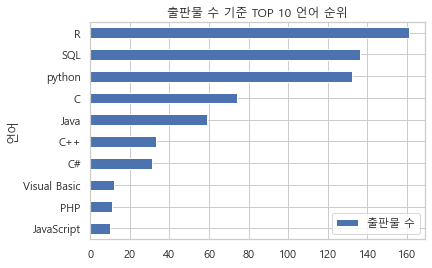

In [57]:
barhGraph_lang(book_counts_language)
# R - SQL - Python 순으로 많다.

## 문제3) 각 출판사별 출판 책의 양으로 순위 매기기

- 2번과 같은 방법으로 pandas 모듈의 pivot_table을 이용해서 데이터를 정리한다.

In [74]:
# 출판물 수를 aggfunc="count" 로 정리해줌
book_counts_publisher = book_info.pivot_table(index="출판사", values="ISBN", aggfunc="count")
book_counts_publisher.rename(columns={"ISBN" : "출판물 수"}, inplace=True)
book_counts_publisher

출판물 수
출판사                          
21세기사                       8
BIGMV센터                     1
BOOKK(부크크)                  6
CHOAlliance                 1
DK로드북스                      1
EBS(한국교육방송공사)               1
GS인터비전                      1
HumanScience(휴먼싸이언스)        1
J&H                         1
McGraw-HillEducation        1
STORYJOA(스토리조아)             1
e퍼플                         2
가나출판사                       1
가메                         11
건기원                         9
경문사                         1
경북대학교출판부                    2
계명대학교출판부                    2
골든래빗                        3
광문각                        10
교우                          4
교학사                         2
구미서관                        2
구민미디어                       1
구민사                         1
그린                          3
글로벌                        12
기한재                         2
길벗                         17
남가람북스                       2
넥서스                         1
노드미디어                       1
노스보스                        3
느린생각                        4
다본                          1
다빈치books                    1
단국대학교출판부                    1
대유학당                        1
더배움                         3
더코딩칼리지                      1
데이코                         3
데이코산업연구소                    2
데이터에듀                       4
도우출판                        1
디비안(DBian)                  1
디지털북스                       3
랩뷰교육원                       1
로드북                         2
루비페이퍼                       6
메인에듀                        2
문운당                         1
미디어정훈(정훈사)                  1
미래출판                        1
박문각                         2
박영사                         1
반니                          1
배움                          1
배움터                         1
범                           1
복두출판사                      12
부산대학교출판문화원                  2
부산대학교출판부                    3
부크크(Bookk)                  3
부크크(bookk)                  3
북랩                          2
북스홀릭퍼블리싱                   12
북이그잼                        1
비비미디어                       1
비앤엠북스                       1
비제이퍼블릭                     15
사도출판                        4
사이버북스                       2
삼양미디어                       1
상학당                         2
생능출판                        7
생능출판사                      11
서강대학교출판부                    1
서울시립대학교출판부                  1
서현사                         2
성안당                        12
세진북스                        1
숨은원리                        1
숭실대학교출판부                    1
스포트라잇북                      1
시대고시기획                     18
시대인                         3
시크릿하우스                      1
씨마스                         1
씨아이알                        3
씨앤씨에듀케이션                    1
씨에치오얼라이언스                   6
씨에치오얼라이언스(CHOAlliance)      2
씨엔씨에듀                       8
아이리포                        2
아이세움                        1
아이콕스                        9
아진                          1
아카데미소프트                     1
아티오                         2
앤써북                         2
양서각                         1
에듀에이지                       2
에듀웨이                        1
에듀윌                         8
에스티유니타스                     2
에이콘출판                      17
에이콘출판사                      2
역락                          1
연두에디션                       6
영진.com(영진닷컴)                4
영진닷컴                        7
예문사                         2
오렌지미디어                      1
오성미디어                       1
와이북스                        1
울산대학교출판부(UUP)               1
원펀치                         1
위드클라우드                      1
위키북스                        7
윈도우                         1
이담북스                        1
이모션북스                       2
이십일세기사                      1
이지스퍼블리싱                     8
이한미디어                       7
인사이트                        6
인피니티북스                     15
일진사                         1
잇플                          1
자유아카데미                     11
전남대학교출판문화원                  1
전북대학교출판문화원                  1
정보문화

In [59]:
book_counts_publisher.info()  # 196개의 출판사가 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 21세기사 to 휴먼싸이언스
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   출판물 수   197 non-null    int64
dtypes: int64(1)
memory usage: 3.1+ KB


In [60]:
book_counts_publisher["출판물 수"].unique()

array([ 8,  1,  6,  2, 11,  9,  3, 10,  4, 12, 17, 15,  7, 18,  5, 27],
      dtype=int64)

In [61]:
book_counts_publisher_10 = book_counts_publisher.sort_values(by="출판물 수", ascending=False).iloc[:10]
book_counts_publisher_10

출판물 수
출판사          
한빛아카데미     27
한빛미디어      18
시대고시기획     18
길벗         17
에이콘출판      17
퍼플         15
비제이퍼블릭     15
인피니티북스     15
글로벌        12
복두출판사      12

In [62]:
def barhGraph_pub(pivotTable):
    pivotTable.sort_values(by="출판물 수").plot(kind="barh", grid=True, title="출판물 수 기준 출판사 TOP 10 순위");

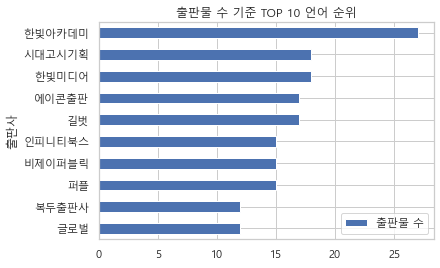

In [63]:
barhGraph_lang(book_counts_publisher_10)
# 한빛아카데미(27), 시대고시기획, 한빛미디어(18), 길벗, 에이콘출판(17) 순으로 많다.
# 아카데미, 시대고시, 길벗 등을 보니까 왠지 자격증 책이 많은 것 같다. 

## 문제4) 최근 2년간(20, 21년) vs 그 전 3년(17, 18, 19년)

- 우리가 가진 컬럼이 "언어, 책 제목, 출판사, 판매가격, ISBN, 링크, 출판시기, 페이지수"
- 언어별로 어떤 변화가 있었는지 확인해보고자 한다.
- 최근과 그 이전을 비교할 만한 데이터는 출판 책 수, 책 가격, 페이지수 정도가 될 것 같다.

In [64]:
book_info.head()

언어                                            책제목   출판사       출판일  \
0  python  Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   상학당  20200915   
1  python                                   Python 프로그래밍    퍼플  20170330   
2  python              파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍  카오스북  20180630   
3  python                                  Python 프로그래밍     퍼플      2017   
4  python                      python으로 배우는 OpenCV 프로그래밍    가메  20180828   

    판매가격                      ISBN  \
0  30000  8965872022 9788965872023   
1  11500  0000281298 1400000281291   
2  25000  1187486183 9791187486183   
3  11500  8924046918 9788924046915   
4  26000  8980782993 9788980782994   

                                                상세링크    연도  페이지수  
0  http://book.naver.com/bookdb/book_detail.php?b...  2020   363  
1  http://book.naver.com/bookdb/book_detail.php?b...  2017   236  
2  http://book.naver.com/bookdb/book_detail.php?b...  2018   526  
3  http://book.naver.com/bookdb/book_detail.php?b...  2017   229  
4  http://book.naver.com/bookdb/book_detail.php?b...  2018   444

#### 1. 언어별 출판된 책의 수
- 편의상 2020-2021을 최근, 2017-2019를 그 이전이라고 명명

In [65]:
book_lang_year = book_info.pivot_table(
    index="언어",
    columns="연도",
    values="ISBN",
    aggfunc="count"
)
book_lang_year

연도            2017  2018  2019  2020  2021
언어                                        
C             16.0  16.0  12.0  10.0  20.0
C#            10.0   5.0   3.0   7.0   6.0
C++           10.0   8.0   2.0  12.0   1.0
Java          14.0  13.0  13.0   7.0  12.0
JavaScript     3.0   3.0   1.0   NaN   3.0
PHP            NaN   4.0   2.0   3.0   2.0
R             35.0  33.0  32.0  35.0  26.0
SQL           17.0  27.0  22.0  38.0  32.0
Visual Basic   6.0   1.0   1.0   2.0   2.0
python        14.0  23.0  26.0  44.0  25.0

In [66]:
# 최근 2년(20,21년)과 그 이전 3년(17,18,19년) 출판수를 보여주는 컬럼 추가
new_year_col = ["2020-2021", "2017-2019"]
book_lang_year[new_year_col] = np.nan
book_lang_year

연도            2017  2018  2019  2020  2021  2020-2021  2017-2019
언어                                                              
C             16.0  16.0  12.0  10.0  20.0        NaN        NaN
C#            10.0   5.0   3.0   7.0   6.0        NaN        NaN
C++           10.0   8.0   2.0  12.0   1.0        NaN        NaN
Java          14.0  13.0  13.0   7.0  12.0        NaN        NaN
JavaScript     3.0   3.0   1.0   NaN   3.0        NaN        NaN
PHP            NaN   4.0   2.0   3.0   2.0        NaN        NaN
R             35.0  33.0  32.0  35.0  26.0        NaN        NaN
SQL           17.0  27.0  22.0  38.0  32.0        NaN        NaN
Visual Basic   6.0   1.0   1.0   2.0   2.0        NaN        NaN
python        14.0  23.0  26.0  44.0  25.0        NaN        NaN

In [67]:
# 2020-2021, 2017-2019 컬럼에 값 추가
book_lang_year["2020-2021"] = book_lang_year.loc[:,[2020, 2021]].sum(axis=1)
book_lang_year["2017-2019"] = book_lang_year.loc[:,[2017,2018,2019]].sum(axis=1)
book_lang_year_setting = book_lang_year[["2020-2021","2017-2019"]]
book_lang_year_setting

연도            2020-2021  2017-2019
언어                                
C                  30.0       44.0
C#                 13.0       18.0
C++                13.0       20.0
Java               19.0       40.0
JavaScript          3.0        7.0
PHP                 5.0        6.0
R                  61.0      100.0
SQL                70.0       66.0
Visual Basic        4.0        8.0
python             69.0       63.0

#### 2. 언어별 출판된 책의 가격과 페이지수
- 갯수가 아니라 평균으로 적용

In [68]:
book_price_year = book_info.pivot_table(
    index="언어",
    columns="연도",
    values="판매가격",
    aggfunc=np.mean
)
book_price_year

연도                    2017          2018          2019          2020  \
언어                                                                     
C             22562.500000  22406.250000  25000.000000  22000.000000   
C#            20180.000000  27000.000000  37666.666667  25857.142857   
C++           24300.000000  29375.000000  26500.000000  26216.666667   
Java          26678.571429  27423.076923  29923.076923  28142.857143   
JavaScript    27333.333333  21666.666667  30000.000000           NaN   
PHP                    NaN  22750.000000  20500.000000  13633.333333   
R             30654.285714  57309.090909  57812.500000  80954.285714   
SQL           27529.411765  29370.370370  29500.000000  28560.526316   
Visual Basic  23833.333333  20000.000000  24000.000000  24500.000000   
python        17950.000000  21113.043478  25869.230769  21247.727273   

연도                    2021  
언어                          
C             27850.000000  
C#            29500.000000  
C++           37000.000000  
Java          27750.000000  
JavaScript    25000.000000  
PHP           22500.000000  
R             24534.615385  
SQL           35306.250000  
Visual Basic  27500.000000  
python        27080.000000

In [69]:
# 2020-2021, 2017-2019 컬럼에 값 추가
book_price_year["2020-2021"] = book_price_year.loc[:,[2020, 2021]].mean(axis=1)
book_price_year["2017-2019"] = book_price_year.loc[:,[2017,2018,2019]].mean(axis=1)
book_price_year_setting = book_price_year[["2020-2021","2017-2019"]]
book_price_year_setting

연도               2020-2021     2017-2019
언어                                      
C             24925.000000  23322.916667
C#            27678.571429  28282.222222
C++           31608.333333  26725.000000
Java          27946.428571  28008.241758
JavaScript    25000.000000  26333.333333
PHP           18066.666667  21625.000000
R             52744.450549  48591.958874
SQL           31933.388158  28799.927378
Visual Basic  26000.000000  22611.111111
python        24163.863636  21644.091416

In [70]:
book_pages_year = book_info.pivot_table(
    index="언어",
    columns="연도",
    values="페이지수",
    aggfunc=np.mean
)

book_pages_year["2017-2019"] = book_pages_year.loc[:,[2017,2018,2019]].mean(axis=1)
book_pages_year["2020-2021"] = book_pages_year.loc[:,[2020, 2021]].mean(axis=1)
book_pages_year_setting = book_pages_year[["2020-2021","2017-2019"]]
book_pages_year_setting

연도             2020-2021   2017-2019
언어                                  
C             482.100000  421.256944
C#            473.023810  522.866667
C++           601.333333  491.450000
Java          593.720238  604.014652
JavaScript    415.000000  422.888889
PHP           272.500000  374.375000
R             435.802198  393.044408
SQL           765.361842  629.378854
Visual Basic  429.000000  511.500000
python        379.029545  372.487179

#### 3. 최근 vs 그 이전 비교 시각화

In [71]:
# book_lang_year_setting, book_price_year_setting, book_pages_year_setting

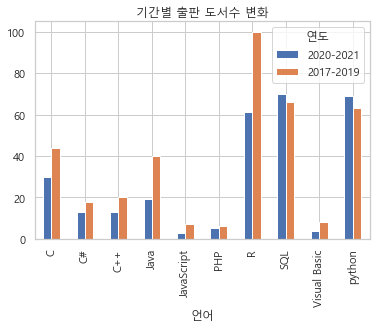

In [83]:
book_lang_year_setting.plot(kind="bar", grid=True, title="기간별 출판 도서수 변화");

- 두 기간 사이에 출판된 책이 증가한 언어는 SQL, Python 이다.
- 눈에 띄는 차이를 보이는 언어는 R과 Java처럼 보인다.

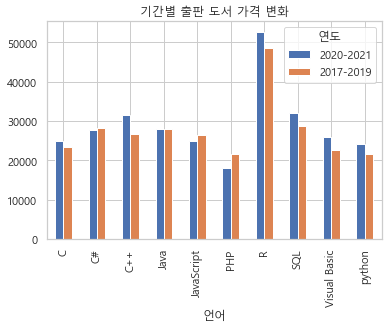

In [84]:
book_price_year_setting.plot(kind="bar", title="기간별 출판 도서 가격 변화");

- 두 기간 사이에 출판된 책의 가격은 거의 유사하다고 판단된다.
- 변화가 있어도 상하위 5천원 수준이다.

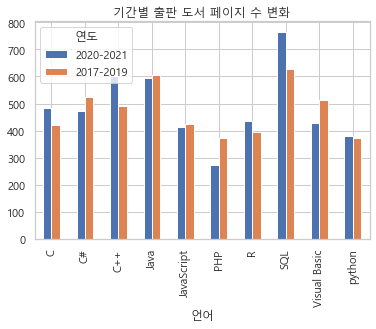

In [86]:
book_pages_year_setting.plot(kind="bar", title="기간별 출판 도서 페이지 수 변화");

- SQL, C++ 수가 눈에 띄게 늘었다.
- Java와 JavaScript, Python은 거의 변화가 없다.
- 그 전에는 몰랐는데, 상대적으로 PHP과 Python의 책페이지수가 다른 언어들에 비해서 적은 편이다.

## 문제5) 언어별 가격 분포, 가격과 페이지수 간의 관계

In [77]:
import seaborn as sns

In [78]:
book_info.head()

언어                                            책제목   출판사       출판일  \
0  python  Python 프로그래밍(스마트로봇 EV3를 활용한) (스마트로봇 EV3를 활용한)   상학당  20200915   
1  python                                   Python 프로그래밍    퍼플  20170330   
2  python              파이썬만 잡아도 기초를 탄탄히 세우는 Python 프로그래밍  카오스북  20180630   
3  python                                  Python 프로그래밍     퍼플      2017   
4  python                      python으로 배우는 OpenCV 프로그래밍    가메  20180828   

    판매가격                      ISBN  \
0  30000  8965872022 9788965872023   
1  11500  0000281298 1400000281291   
2  25000  1187486183 9791187486183   
3  11500  8924046918 9788924046915   
4  26000  8980782993 9788980782994   

                                                상세링크    연도  페이지수  
0  http://book.naver.com/bookdb/book_detail.php?b...  2020   363  
1  http://book.naver.com/bookdb/book_detail.php?b...  2017   236  
2  http://book.naver.com/bookdb/book_detail.php?b...  2018   526  
3  http://book.naver.com/bookdb/book_detail.php?b...  2017   229  
4  http://book.naver.com/bookdb/book_detail.php?b...  2018   444

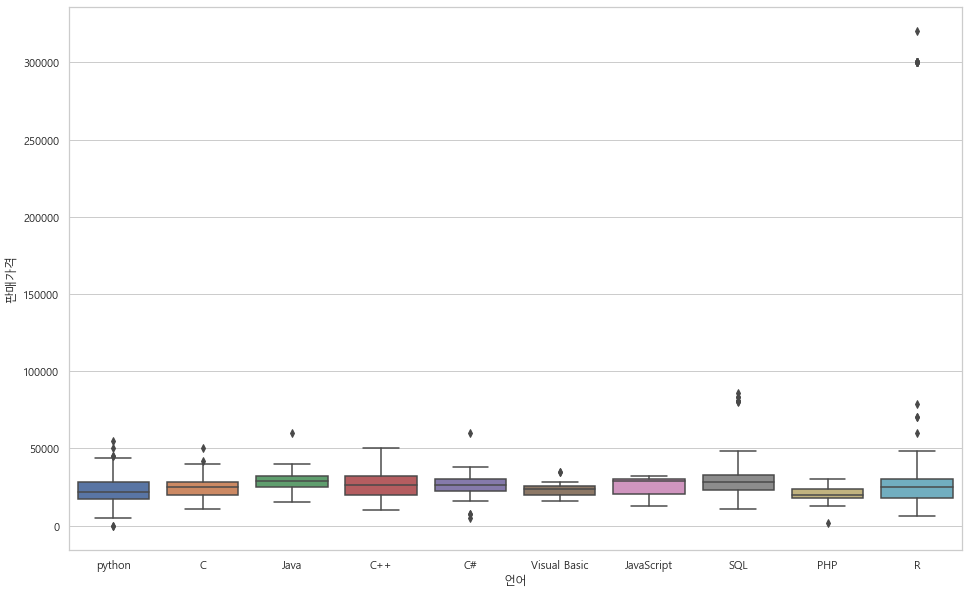

In [79]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=book_info,
    x="언어",
    y="판매가격"
);
# SQL, PHP, R의 아웃라이어가 있음
# 판매가격을 10만원 이내로 설정해서 다시 보자.

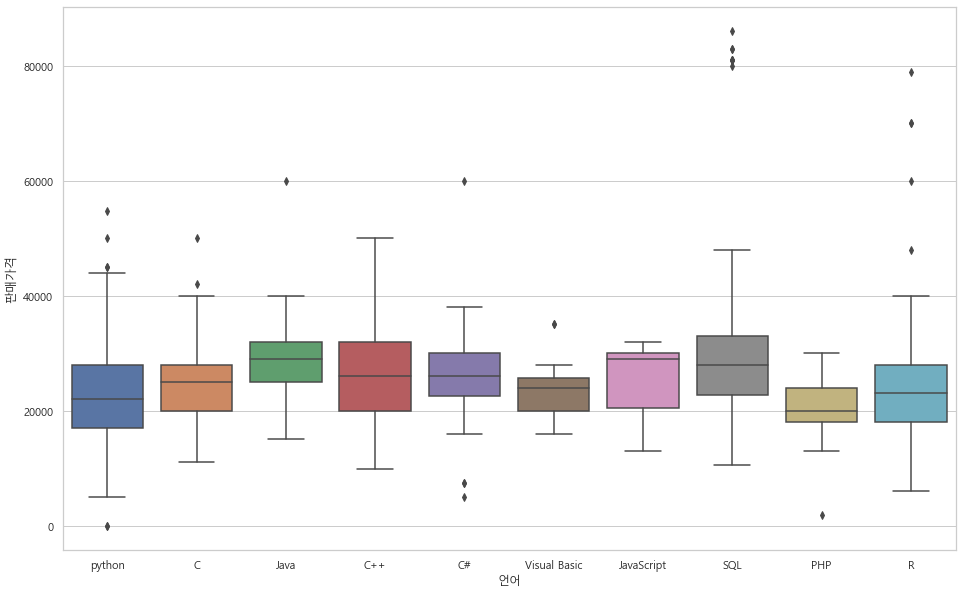

In [80]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=book_info[book_info["판매가격"] < 100000],
    x="언어",
    y="판매가격",
);

- 전반적으로 책 판매가격은 유사하게 나타나고 있다.
- Python, C++, SQL, R은 가격대가 책에 따라 넓게 분포가 나타난다.
- Java와 C#, Visual Basic, PHP는 책 간의 가격 차이가 별로 없다.

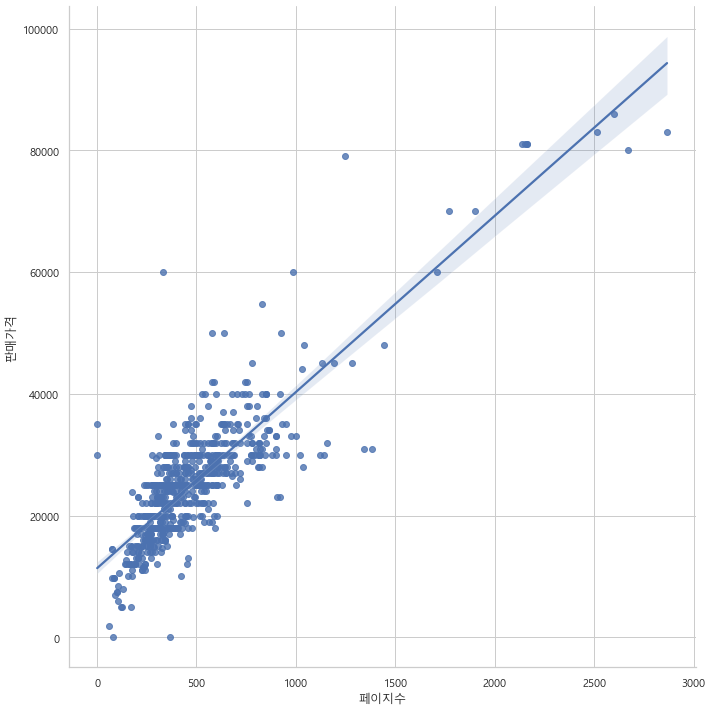

In [81]:
# 페이지수와 연관이 있는 것일까?

sns.lmplot(
    data=book_info[book_info["판매가격"] < 100000],
    x="페이지수",
    y="판매가격",
    robust=True,
    size=10
);

In [82]:
book_info[["판매가격","연도","페이지수"]].corr()

판매가격        연도      페이지수
판매가격  1.000000  0.034776  0.237177
연도    0.034776  1.000000  0.103240
페이지수  0.237177  0.103240  1.000000

- 비교적으로 페이지수와 판매가격은 상관관계가 있는 듯하다.
- corr()을 살펴보면, 다른 변수들에 비해서 판매가격과 페이지수 사이의 상관관계계수가 높다.